<a href="https://colab.research.google.com/github/Charan0747/VOIS_AICTE_Oct2025_Machineni_Charan_Teja/blob/main/Airbnb_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Airbnb_Open_Data.csv',low_memory=False)

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [8]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [9]:
# Removing duplicates
df.drop_duplicates(inplace=True)

# Drop house_rules and license columns if they exist
cols_to_drop = ['house_rules', 'license']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# Remove $ and , from price and service fee columns
df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Rename columns
df.rename(columns={'price': 'price_$', 'service fee': 'service_fee_$'}, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert to appropriate data types
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

#Correct the Spelling of the 'brookln' to 'Brroklyn'
df.loc[df['neighbourhood group'] == 'brookln','neighbourhood group'] = 'Brooklyn'

#Get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 500].index)

In [10]:
df.duplicated().value_counts()

,count
False,83411


In [11]:
df.info()-

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

**EDA**

In [12]:
#Shows the Stastiscal Summary.
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


In [13]:
#What are the different property types in the dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


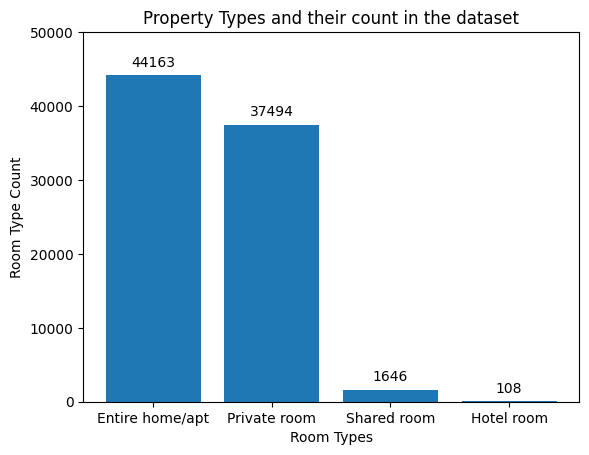

In [14]:
#Room type count Plotted on a barchart.
room_type_bar = plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels = property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000])
plt.xlabel('Room Types');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the dataset');

In [15]:
#Which neighbourhood group has the highest number of listings?
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816


Text(0.5, 1.0, 'Which Neighbourhood Groups has the highest number of Listings')

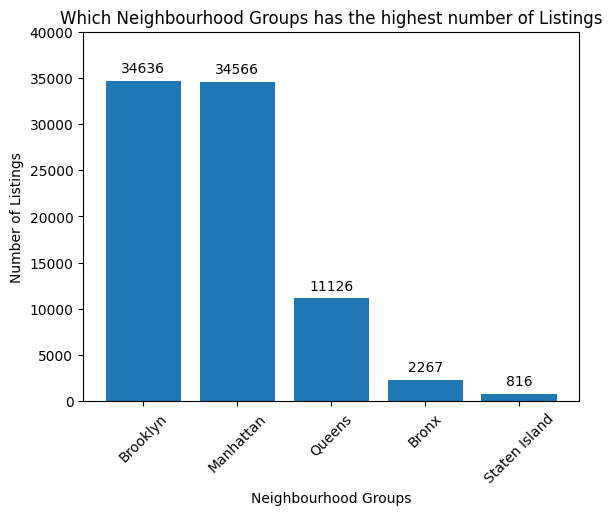

In [18]:
hood_group_bar = plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels = hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000])
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which Neighbourhood Groups has the highest number of Listings')

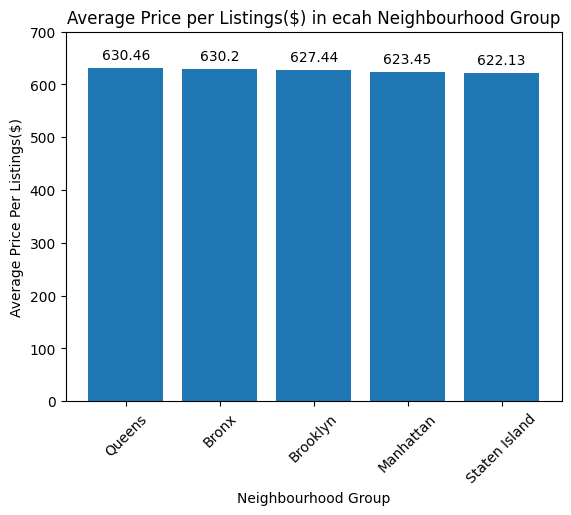

In [21]:
#Which neighbourhood group has the highest averae prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index,avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar,labels = round(avg_price.loc[:,"price_$"],2),label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price Per Listings($)');
plt.xticks(rotation=45);
plt.title('Average Price per Listings($) in ecah Neighbourhood Group');
plt.show()

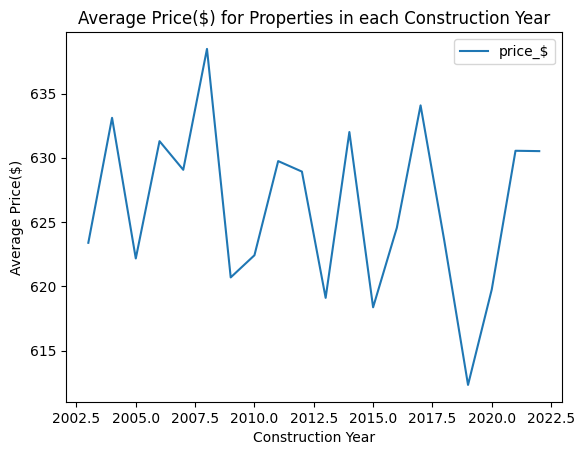

In [23]:
#Is there a relationship between the Construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price($)');
plt.title('Average Price($) for Properties in each Construction Year');
plt.show()

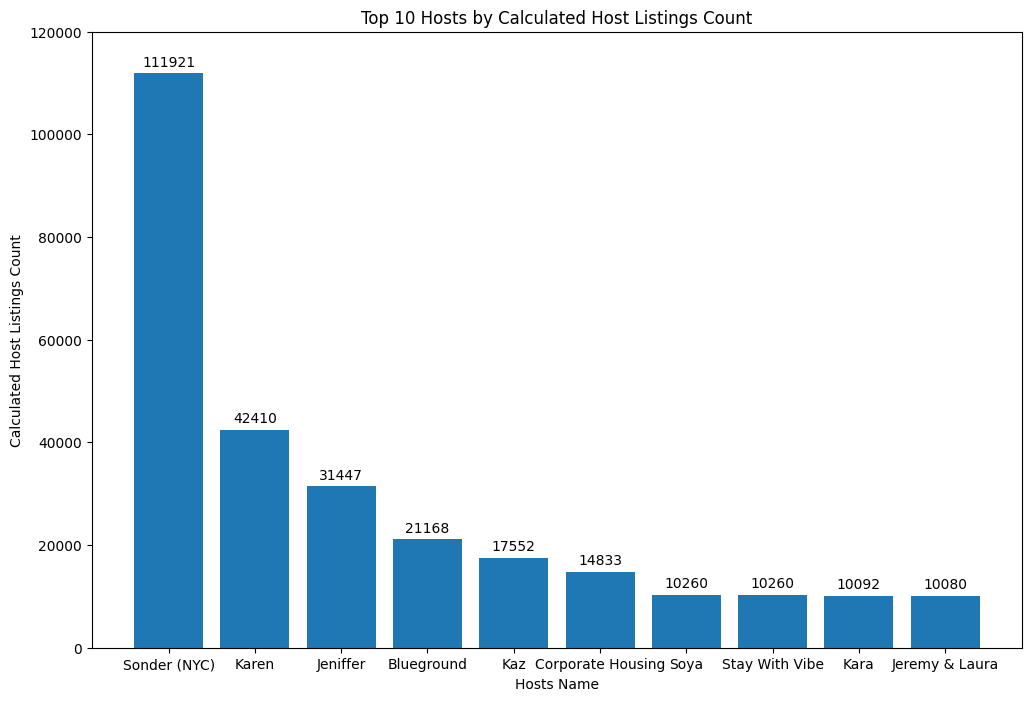

In [43]:
#who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
plt.figure(figsize=(12,8));
hosts_bar = plt.bar(hosts.index,hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar,label = hosts.loc[:,'calculated host listings count'],label_type='edge',padding=3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated Host Listings Count');
plt.show();

In [30]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


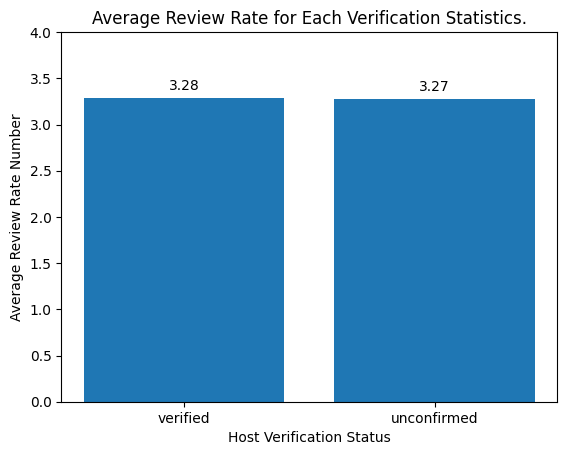

In [33]:
review_bar = plt.bar(review.index,review.loc[:,"review rate number"]);
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for Each Verification Statistics.');
plt.show()

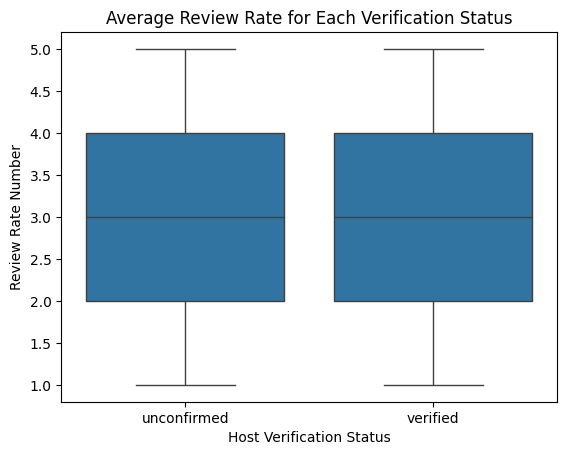

In [34]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df,x = "host_identity_verified",y = "review rate number",color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for Each Verification Status');
plt.show()

In [35]:
# Is there any correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909074778258)

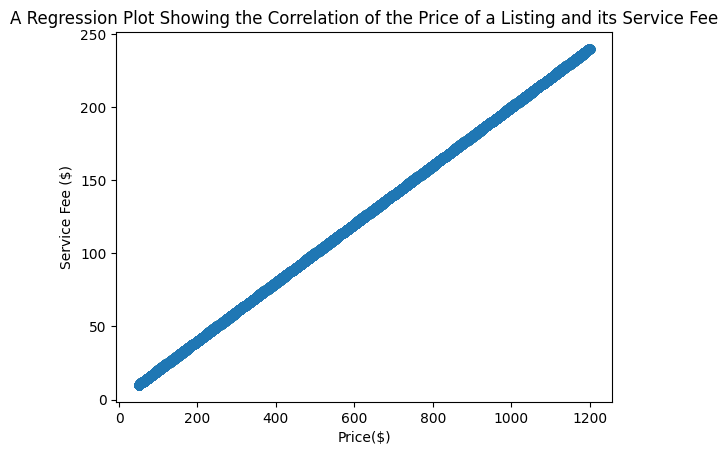

In [36]:
sns.regplot(df,x = 'price_$', y= 'service_fee_$');
plt.xlabel('Price($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot Showing the Correlation of the Price of a Listing and its Service Fee')
plt.show()

In [37]:
#What is the average review rate number(e.g., stars) for listings, and does it vary based on the neighbourhodd group and room type
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

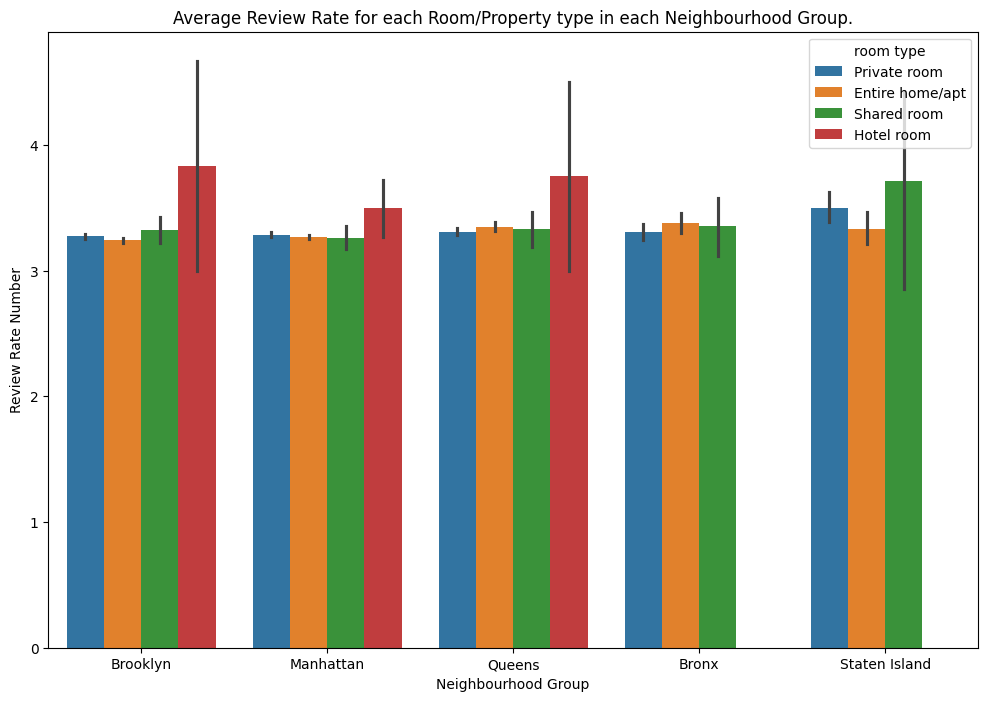

In [44]:
plt.figure(figsize=[12,8]);
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue = 'room type')
plt.xlabel('Neighbourhood Group');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Room/Property type in each Neighbourhood Group.');
plt.show()

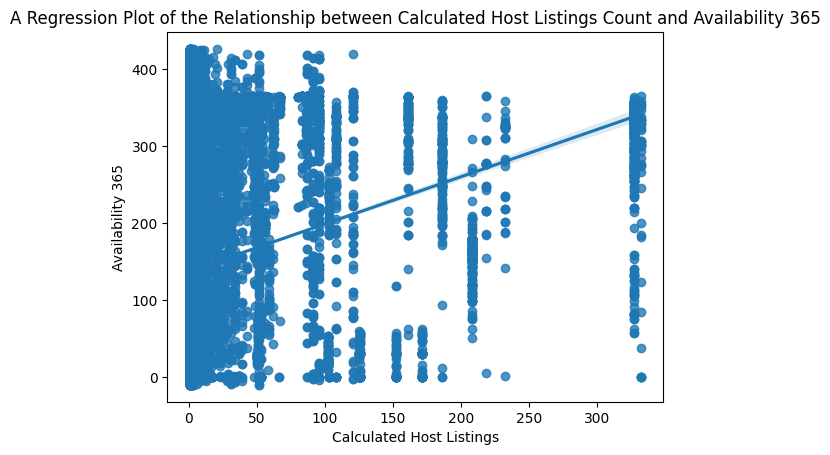

In [40]:
#Are hosts with a higher calculated host listings count more likely to maintaim highest availability throughou the year?
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');
plt.show();

In [41]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359855273675869)